<a href="https://colab.research.google.com/github/nattzza/Credit-Card-Customer-Segmenation/blob/main/ML_Day_9_Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### You are given a dataset of credit card transactions. The dataset contains 8500 customers and their activity over a 6-month period. Each transaction is characterized by 18 features described below.

### Your task is to find the most useful customer segmentation to improve the marketing campaigns of the company.

**The features:**

customer_id : id of the credit card holder

balance_account : balance amount left in the account to make purchases at the end of the 6-month period

purchases_amount : amount of purchases made from account

paid_advance : number of transactions made with “Cash in Advance” method

full_purchases : maximum purchase amount done in full payment

balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

installments : amount of purchases done in installments

purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

cash_advance_frequency : how frequently the cash in advance being paid

nr_cash_advances : cash in advance given by the user

nr_purchases : number of purchase transactions made

credit_limit : limit of credit card for user

fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)

payments : amount of payment done by user

min_payments : minimum amount of payments made by user

full_payment_prc : percent of full payment paid by user

## 1. Getting and Loading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Exploratory Data Analysis

In [3]:
df = pd.read_csv("./card_transactions.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [4]:
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [5]:
# df = df.drop(columns="customer_id")


In [6]:
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [7]:
# If the power of debt payments are exluced in this analyses (if we care only to activate/promote spending of customers), the below columns could be deleted. 

df = df.drop(columns="full_payment_prc")        # percent of full payment paid by user
df = df.drop(columns="min_payments")            # minimum amount of payments made by user
df = df.drop(columns="payments")                 # amount of payment done by user
df = df.drop(columns="fixed_rate_period")       # duration of fixed interest rate of credit card service for user (in months)
df = df.drop(columns="nr_cash_advances")        # cash in advance given by the user
df = df.drop(columns="cash_advance_frequency")  #  how frequently the cash in advance being paid

In [8]:
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,nr_purchases,credit_limit
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,10,1000.0
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,6,1000.0
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0,1500.0
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,13,2000.0
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,1,2500.0


Visualize Sales vs. Order Date

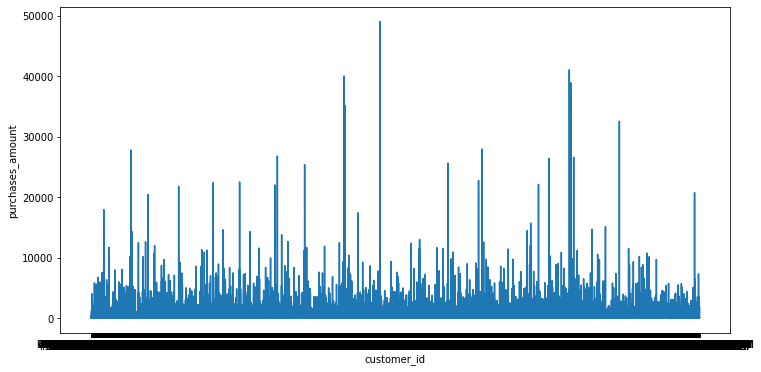

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x=df['customer_id'], y=df['purchases_amount']);

In [10]:
df['purchases_amount'].describe()

count     8500.000000
mean       999.561312
std       2154.189460
min          0.000000
25%         39.000000
50%        360.000000
75%       1105.897500
max      49039.570000
Name: purchases_amount, dtype: float64